In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('BigTests.pickle', 'rb')
data = pickle.load(f)

In [2]:
print(data['var'])
print(data['order'])

{'globalRecluster': ['false', 'true'], 'clusteringOn': ['false', 'true'], 'bluetoothLossPercentage': [0, 1e-06, 2e-06, 5e-06, 2e-05], 'reclusterThreshold': [0.025, 0.05, 0.1, 0.15, 0.2, 0.4], 'clusterMinThresh': [0, 2], 'localRecluster': [0, 1, 2, 3], 'totalNodes': [500, 1000, 2000, 3500], 'reclusterPeriod': [5, 30, 90], 'wifiLossPercentage': [2e-05, 5e-05]}
['globalRecluster', 'localRecluster', 'reclusterPeriod', 'wifiLossPercentage', 'totalNodes', 'clusteringOn', 'clusterMinThresh', 'bluetoothLossPercentage', 'reclusterThreshold']


In [3]:
i = 0
for key in data['data'].keys():
    i += len(data['data'][key])
print(i)

24352


In [7]:
def compareLocalClusteringAndTotalNodes():
    stats = {}
    for key in data['data'].keys():
        for run in data['data'][key]:
            statsKey = '%d-%d' % (key[4], key[1])
            if statsKey in stats.keys():
                stats[statsKey]['Percent'] += run['Percent Nodes Dead']
                stats[statsKey]['Average'] += run['Average Remaining Battery']
                stats[statsKey]['Runs'] += 1
            else:
                stats[statsKey] = {}
                stats[statsKey]['Percent'] = run['Percent Nodes Dead']
                stats[statsKey]['Average'] = run['Average Remaining Battery']
                stats[statsKey]['Runs'] = 1
    for key in stats.keys():
        stats[key]['Percent'] = stats[key]['Percent']/stats[key]['Runs']
        stats[key]['Average'] = stats[key]['Average']/stats[key]['Runs']
    return stats

#print(compareLocalClusteringAndTotalNodes())

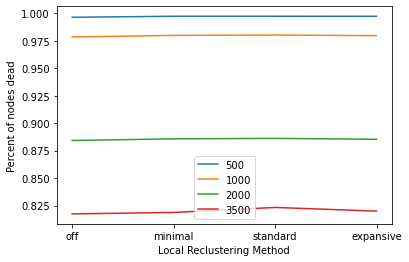

In [8]:
stats = compareLocalClusteringAndTotalNodes()
x = ['off', 'minimal', 'standard', 'expansive']
for nodeCount in data['var']['totalNodes']:
    y = []
    for i in data['var']['localRecluster']:
        y += [stats['%d-%d' % (nodeCount, i)]['Percent']]
    plt.plot(x, y, label='%d' % nodeCount)
plt.xlabel('Local Reclustering Method')
plt.ylabel('Percent of nodes dead')
plt.legend()
plt.show()

In [4]:
def compareBatteriesOverTime(keyInds):
    stats = {}
    counts = {}
    minArrLen = 10000000
    for key in data['data'].keys():
        for run in data['data'][key]:
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run['Percent Alive Over Time']
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    return stats

In [10]:
def generateBatteriesOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr):
    if currentLevel < len(keyInds):
        for var in data['var'][data['order'][keyInds[currentLevel]]]:
            generateBatteriesOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)])
    else:
        key = ''
        for s in strArr:
            key += s + '-'
        key = key[:len(key)-1]
        if key in stats.keys():
            y = stats[key]
            plt.plot(x, y, label=key)
    if currentLevel == separationLevel:
        plt.xlabel('Time')
        plt.ylabel('Percent of nodes alive')
        plt.legend()
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

def generateBatteriesOverTimeGraphs(stats, separationLevel):
    generateBatteriesOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [])

In [6]:
batteriesOverTimeLocalReclustering = compareBatteriesOverTime([4,1])

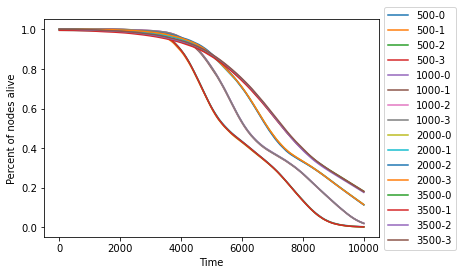

In [11]:
generateBatteriesOverTimeGraphs(batteriesOverTimeLocalReclustering, 0)

In [14]:
batteriesOverTimeGlobalReclustering = compareBatteriesOverTime([0])

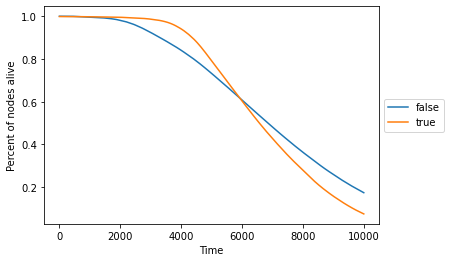

In [15]:
generateBatteriesOverTimeGraphs(batteriesOverTimeGlobalReclustering, 0)

In [16]:
batteriesOverTimeGlobalTotal = compareBatteriesOverTime([4, 0])

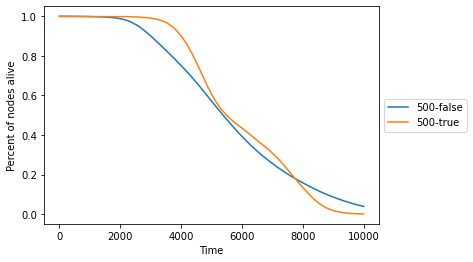

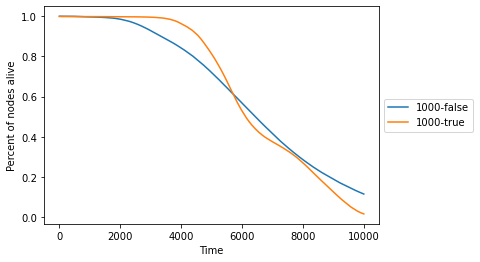

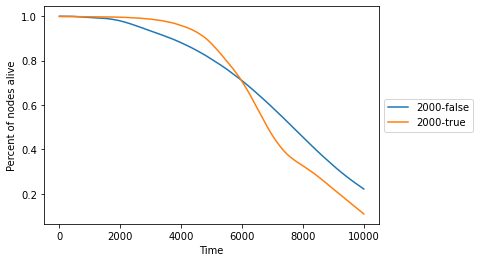

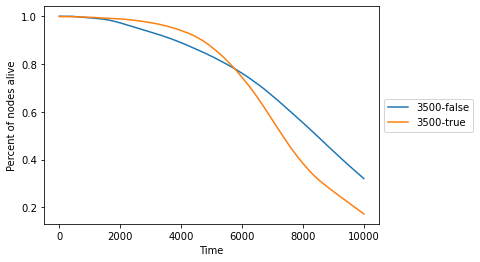

In [17]:
generateBatteriesOverTimeGraphs(batteriesOverTimeGlobalTotal, 1)

In [21]:
batteriesOverTime_GlobalTotalThreshold = compareBatteriesOverTime([4, 0, 8])

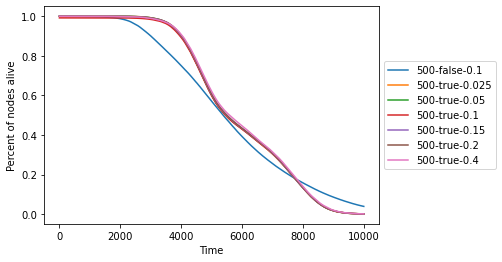

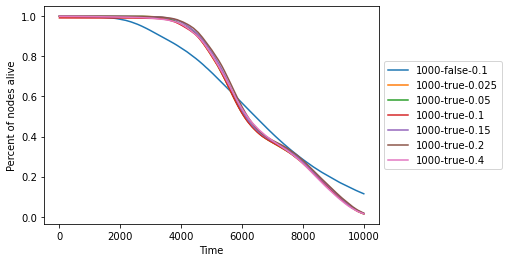

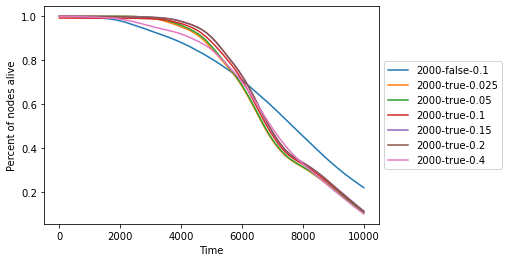

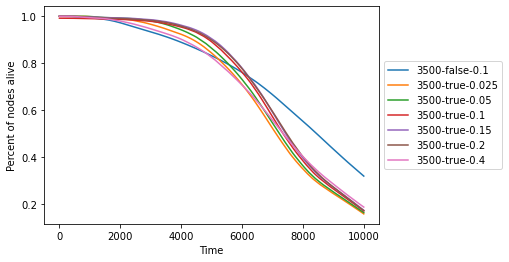

In [22]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThreshold, 1)

In [23]:
batteriesOverTime_GlobalTotalThresholdPeriod = compareBatteriesOverTime([4, 0, 8, 2])

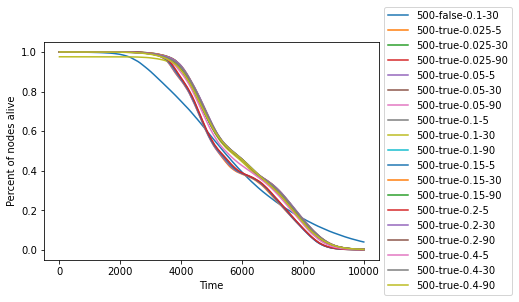

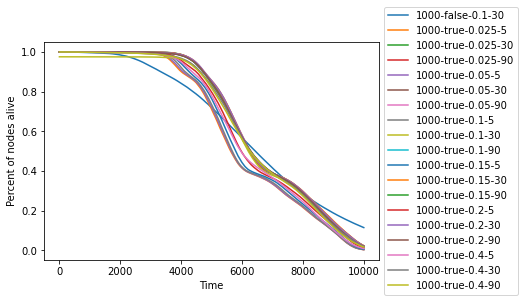

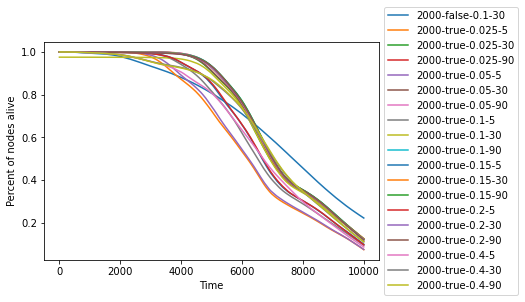

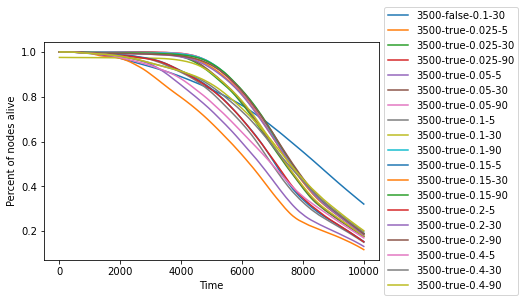

In [24]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThresholdPeriod, 1)

In [27]:
batteriesOverTime_GlobalTotalThresholdPeriodMin = compareBatteriesOverTime([4, 6, 0, 8, 2])

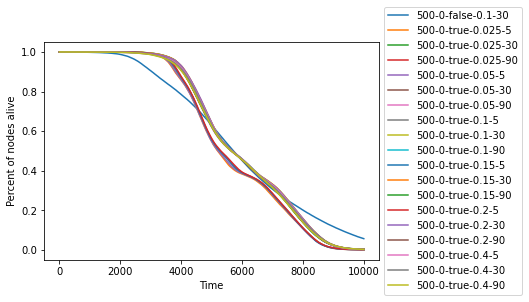

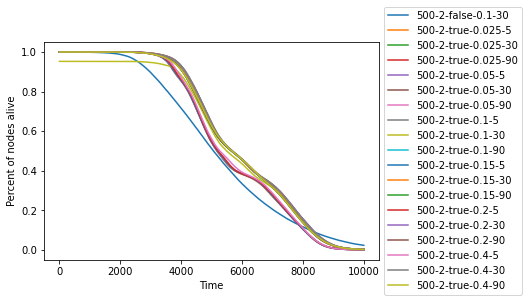

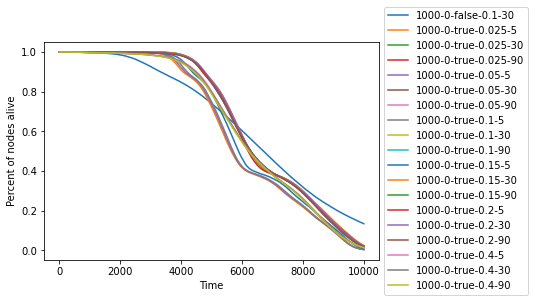

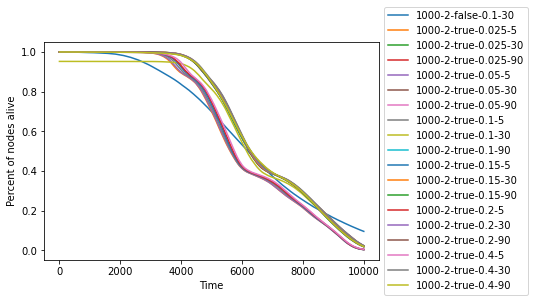

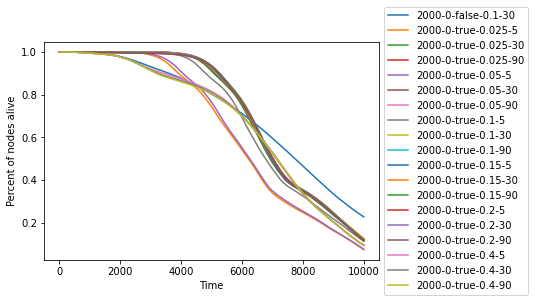

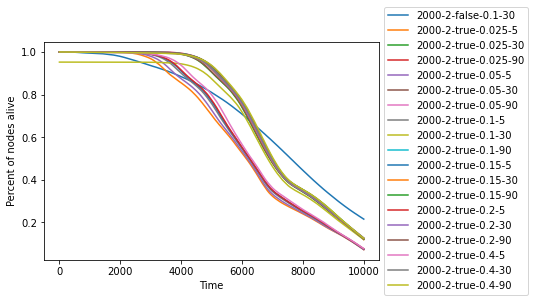

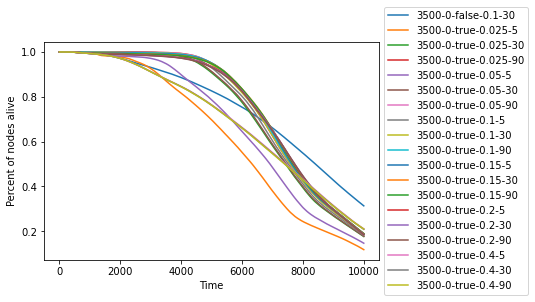

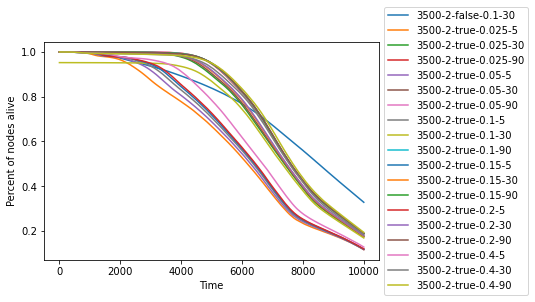

In [28]:
generateBatteriesOverTimeGraphs(batteriesOverTime_GlobalTotalThresholdPeriodMin, 2)

In [12]:
batteriesOverTime_Clusters = compareBatteriesOverTime([5])

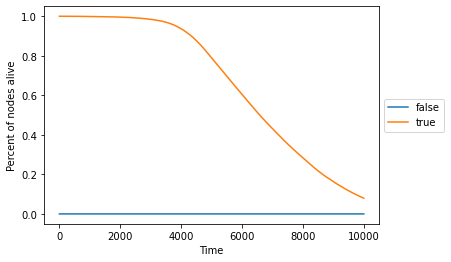

In [13]:
generateBatteriesOverTimeGraphs(batteriesOverTime_Clusters, 0)